# Locate detected units

### Setup

activate `npx_10m_384ch_unit_classes`

In [6]:
import numpy as np
import os
import bluepy as bp
from matplotlib import pyplot as plt 

# SET PATHS
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/bernstein_2023/"

os.chdir(PROJ_PATH)

from src.nodes.dataeng.silico import probe_wiring
from src.nodes.utils import get_config
from src.nodes.postpro.accuracy import get_sorting_accuracies
from src.nodes.load import load_campaign_params
from src.nodes.dataeng.silico.filtering import filter_microcircuit_cells

# SET PARAMETERS
EXPERIMENT = "silico_neuropixels"       # specifies the experiment from conf/
SIMULATION_DATE = "2023_02_19"          # specifies the run (date)
CONTACT_IDS = np.arange(127, 127+32, 1) # selected contact ids from Neuropixels-384 template for our probe
DET_THRESH = 0.8

# SETUP CONFIG
data_conf, param_conf = get_config(EXPERIMENT, SIMULATION_DATE).values()

OUR_KS3_SORTING_PATH = data_conf["sorting"]["sorters"]["kilosort3"]["output"]
OUR_GT_SORTING_PATH = data_conf["sorting"]["simulation"]["ground_truth"]["output"]

2023-09-12 16:02:16,604 - root - utils.py - get_config - INFO - Reading experiment config.
2023-09-12 16:02:16,636 - root - utils.py - get_config - INFO - Reading experiment config. - done


### Locate probe

In [3]:
# get contact coordinates
recording = probe_wiring.run_neuropixels_32(data_conf, param_conf)
ProbeNeuropix32 = recording.get_probe()
probe_coord = ProbeNeuropix32.contact_positions.astype(float)

2023-09-12 15:55:01,753 - root - probe_wiring.py - run_neuropixels_32 - INFO - casting raw traces as SpikeInterface Recording object ...
2023-09-12 15:55:01,757 - root - probe_wiring.py - run_neuropixels_32 - INFO - casting as raw traces as SpikeInterface Recording object - done in 0.0
2023-09-12 15:55:01,759 - root - probe_wiring.py - run_neuropixels_32 - INFO - reconstructing neuropixels-32 probe ...


/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/indexes/multi.py:643: DeprecationWarning: `cumproduct` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `cumprod` instead.
  codes = cartesian_product(codes)
/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [
/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [


2023-09-12 15:56:08,682 - root - probe_wiring.py - run_neuropixels_32 - INFO - reconstructing neuropixels-32 probe - done in 66.9
2023-09-12 15:56:08,684 - root - probe_wiring.py - run_neuropixels_32 - INFO - wiring neuropixels-32 probe to recording - done


In [4]:
ProbeNeuropix32.contact_ids

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31'], dtype='<U64')

### Locate detected units

In [7]:
# takes 2 min
# get npx32 accuracies
npx32_accuracies = get_sorting_accuracies(OUR_GT_SORTING_PATH, OUR_KS3_SORTING_PATH)
npx32_acc_array = np.array(npx32_accuracies)

# get detected unit ids
detected = npx32_accuracies[npx32_accuracies >= DET_THRESH].index.tolist()
print("Well detected units (npx382):", detected)

# load simulation parameters
simulation = load_campaign_params(data_conf)
detected_coord = simulation["circuit"].cells.get(group = detected, properties = [bp.Cell.X, bp.Cell.Y, bp.Cell.Z])

Well detected units (npx382): [3891529, 2113524, 1808832, 2121825]


/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/indexes/multi.py:643: DeprecationWarning: `cumproduct` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `cumprod` instead.
  codes = cartesian_product(codes)
/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [
/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [


### Plot units and contacts

/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/indexes/multi.py:643: DeprecationWarning: `cumproduct` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `cumprod` instead.
  codes = cartesian_product(codes)
/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [
/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/reshape/util.py:60: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return [


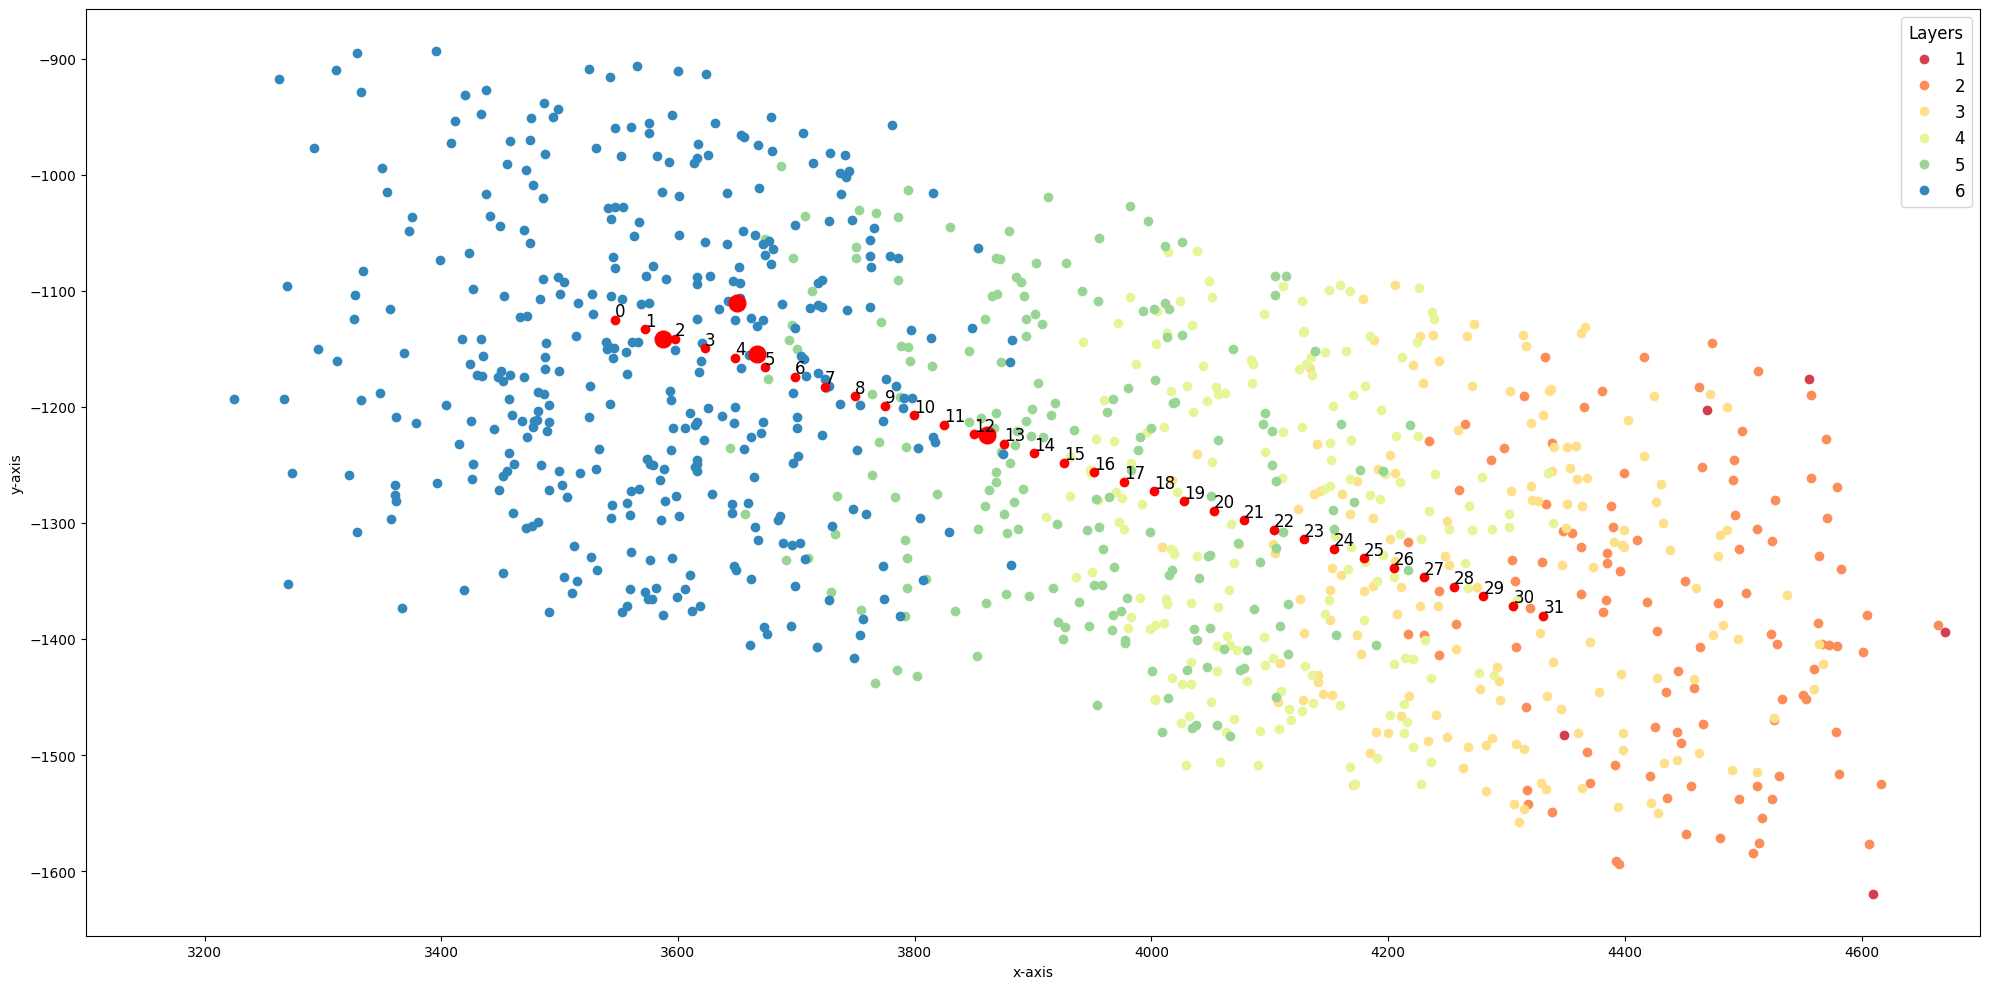

In [10]:
# Get coordinates of a sample of the column cells (else rendering last a while)
simulation = load_campaign_params(data_conf)
microcircuit = filter_microcircuit_cells(simulation)
microcircuit_coord = microcircuit["soma_location"].sample(n=1000, axis=0, random_state=1)

# get cell layers
cell_layers = simulation["circuit"].cells.get(group=microcircuit["gid"], properties="layer")

# angle view 4
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# plot cells colored by layer
layer_color = [
    (0,0,0),
    (213/255, 62/255, 79/255),
    (252/255, 141/255, 89/255),
    (254/255, 224/255, 139/255),
    (230/255, 245/255, 152/255),
    (153/255, 213/255, 148/255),
    (50/255, 136/255, 189/255)
    ]

layers = np.sort(cell_layers.unique())

for layer_i in layers:
    ax.plot(
        microcircuit_coord.x[cell_layers==layer_i],
        microcircuit_coord.y[cell_layers==layer_i],
        ".",
        color=layer_color[layer_i],
        markersize=12,
    )

# plot contacts
ax.plot(
    probe_coord[:, 0],
    probe_coord[:, 1],
    marker=".",
    markersize=12,
    color="r",
    markeredgecolor="r",
    linestyle="None",
)

# label contacts
for ix in range(len(probe_coord)):
    ax.text(
        probe_coord[ix, 0],
        probe_coord[ix, 1] + 3,
        "%s" % (str(ProbeNeuropix32.contact_ids[ix])),
        size=12,
        zorder=100,
        color="k",
    )
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_xlim([3100, 4700])
plt.tight_layout()
legend = ax.legend(layers, fontsize=12, title = "Layers")
plt.setp(legend.get_title(),fontsize=12)

# Highligh well sorted units
ax.plot(detected_coord.x, detected_coord.y, "ro", markersize=12);
plt.show()